In [1]:
##import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingClassifier 
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

C:\Users\sgudda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\sgudda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\sgudda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be 

In [2]:
### Loading the Train and Test Data since both data having differenct categories 
train = pd.read_csv('Train.csv') 
test = pd.read_csv('Test.csv')

In [3]:
train.shape,test.shape

((543, 8), (233, 7))

In [4]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [28]:
train['IsUnderRisk'].value_counts()

1    340
0    203
Name: IsUnderRisk, dtype: int64

In [6]:
X=train.drop(['IsUnderRisk'],axis=1)
y=train['IsUnderRisk']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10,random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((488, 7), (55, 7), (488,), (55,))

In [7]:
## Logistic Regresson 
from sklearn.linear_model import LogisticRegression
lnr_class = LogisticRegression()
lnr_class.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(lnr_class, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = lnr_class.predict(X_test)
accuracy_score(y_test, y_predict)

0.7818181818181819

In [25]:
model=RandomForestClassifier(n_estimators=250,class_weight='balanced',min_samples_leaf=1,random_state=99)
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred= model.predict(X_test)
y_probs= model.predict_proba(X_test)
score_r = log_loss(y_test,y_probs)
print(score_r)

87.8048780487805
0.2842091268006564


In [65]:
from sklearn.metrics import log_loss
y_pred= model.predict(X)
y_probs= model.predict_proba(X)

In [67]:
score = log_loss(train["IsUnderRisk"],y_probs)

In [68]:
score

0.2508915003167487

In [69]:
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
score_r

0.2508915003167487

In [70]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test_r = model.predict_proba(test)
y_probs_test_r

array([[4.74103846e-02, 9.52589615e-01],
       [2.69362028e-01, 7.30637972e-01],
       [8.68906001e-01, 1.31093999e-01],
       [2.94371208e-03, 9.97056288e-01],
       [3.26793787e-01, 6.73206213e-01],
       [7.34379526e-01, 2.65620474e-01],
       [9.21196892e-01, 7.88031083e-02],
       [8.95770965e-01, 1.04229035e-01],
       [2.17482954e-01, 7.82517046e-01],
       [2.54660130e-02, 9.74533987e-01],
       [8.58564079e-02, 9.14143592e-01],
       [8.71489082e-01, 1.28510918e-01],
       [5.52758419e-01, 4.47241581e-01],
       [7.48349694e-01, 2.51650306e-01],
       [3.93008421e-02, 9.60699158e-01],
       [8.64677591e-01, 1.35322409e-01],
       [4.26855774e-01, 5.73144226e-01],
       [7.62265890e-01, 2.37734110e-01],
       [3.12474334e-01, 6.87525666e-01],
       [0.00000000e+00, 1.00000000e+00],
       [7.32443600e-01, 2.67556400e-01],
       [5.80011735e-01, 4.19988265e-01],
       [2.74723765e-01, 7.25276235e-01],
       [8.84111525e-01, 1.15888475e-01],
       [8.191604

In [72]:
submission = pd.DataFrame(y_probs_test_r)
submission.to_excel("submissionInspectionResults_San.xls",index=False)

In [73]:
# Let's implement simple classifiers

from sklearn import ensemble

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [74]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 80.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 77.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 83.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 80.0 % accuracy score


In [75]:
from catboost import CatBoostClassifier
model_c = CatBoostClassifier(iterations=2,
                           learning_rate=0.2,
                           depth=5)
model_c.fit(X_train, y_train)
cross_val_score(model_c, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model_c.predict(X_test)
accuracy_score(y_test, y_predict)*100

0:	learn: 0.6156750	total: 2ms	remaining: 2ms
1:	learn: 0.5700716	total: 3.95ms	remaining: 0us
0:	learn: 0.6206745	total: 1.54ms	remaining: 1.54ms
1:	learn: 0.5727256	total: 2.48ms	remaining: 0us
0:	learn: 0.6263108	total: 2.62ms	remaining: 2.62ms
1:	learn: 0.5766771	total: 4.25ms	remaining: 0us
0:	learn: 0.6321967	total: 2.12ms	remaining: 2.12ms
1:	learn: 0.5904463	total: 4.22ms	remaining: 0us
0:	learn: 0.6249218	total: 1.77ms	remaining: 1.77ms
1:	learn: 0.5767602	total: 3.99ms	remaining: 0us
0:	learn: 0.6220330	total: 3.39ms	remaining: 3.39ms
1:	learn: 0.5803636	total: 5.21ms	remaining: 0us


87.1559633027523

In [77]:
from sklearn.metrics import log_loss
y_pred_c= model_c.predict(X)
y_probs_c= model_c.predict_proba(X)
score_c = log_loss(train["IsUnderRisk"],y_probs_c)
score_c

0.5703067718580115

In [79]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores*100

Internal_Audit_Score    39.559148
External_Audit_Score    20.658553
Location_Score          16.824103
Fin_Score               13.008180
City                     6.155741
Loss_score               2.447955
Past_Results             1.346319
dtype: float64

In [13]:
train1 = train[['Internal_Audit_Score','External_Audit_Score','Location_Score','Fin_Score','City','IsUnderRisk']]

In [14]:
test1 = test[['Internal_Audit_Score','External_Audit_Score','Location_Score','Fin_Score','City']]

In [15]:
X=train1.drop(['IsUnderRisk'],axis=1)
y=train1['IsUnderRisk']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15,random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((461, 5), (82, 5), (461,), (82,))

In [17]:
model=RandomForestClassifier(n_estimators=188,class_weight='balanced',min_samples_leaf=5,random_state=99)
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)*100
from sklearn.metrics import log_loss
y_pred_r= model.predict(X_test)
y_probs_r= model.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
score_r

0.3053320586683203

In [86]:
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
score_r

0.234756493070287

In [87]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test

array([[7.70693755e-03, 9.92293062e-01],
       [1.59937646e-01, 8.40062354e-01],
       [9.30826217e-01, 6.91737830e-02],
       [0.00000000e+00, 1.00000000e+00],
       [3.30965317e-01, 6.69034683e-01],
       [7.78846529e-01, 2.21153471e-01],
       [9.30129301e-01, 6.98706988e-02],
       [9.09906364e-01, 9.00936358e-02],
       [1.62025059e-01, 8.37974941e-01],
       [8.56486879e-03, 9.91435131e-01],
       [1.48600891e-02, 9.85139911e-01],
       [8.93047343e-01, 1.06952657e-01],
       [6.47029358e-01, 3.52970642e-01],
       [7.65299833e-01, 2.34700167e-01],
       [7.21967863e-03, 9.92780321e-01],
       [8.95182558e-01, 1.04817442e-01],
       [4.40360958e-01, 5.59639042e-01],
       [8.12360002e-01, 1.87639998e-01],
       [2.81791084e-01, 7.18208916e-01],
       [0.00000000e+00, 1.00000000e+00],
       [8.17355509e-01, 1.82644491e-01],
       [6.61955402e-01, 3.38044598e-01],
       [1.81836366e-01, 8.18163634e-01],
       [8.77461528e-01, 1.22538472e-01],
       [7.909958

In [88]:
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San1.xls",index=False)

In [109]:
model=RandomForestClassifier(n_estimators=88,class_weight='balanced',min_samples_leaf=1,random_state=99)
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

88.9908256880734
0.12116486458323213


In [110]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test

array([[0.        , 1.        ],
       [0.06818182, 0.93181818],
       [0.89772727, 0.10227273],
       [0.        , 1.        ],
       [0.22727273, 0.77272727],
       [0.76136364, 0.23863636],
       [0.96590909, 0.03409091],
       [0.90909091, 0.09090909],
       [0.10227273, 0.89772727],
       [0.        , 1.        ],
       [0.01136364, 0.98863636],
       [0.93181818, 0.06818182],
       [0.60227273, 0.39772727],
       [0.67045455, 0.32954545],
       [0.        , 1.        ],
       [0.77272727, 0.22727273],
       [0.25      , 0.75      ],
       [0.60227273, 0.39772727],
       [0.22727273, 0.77272727],
       [0.        , 1.        ],
       [0.69318182, 0.30681818],
       [0.52272727, 0.47727273],
       [0.04545455, 0.95454545],
       [0.875     , 0.125     ],
       [0.71590909, 0.28409091],
       [0.        , 1.        ],
       [0.20454545, 0.79545455],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.59090909, 0.40909091],
       [0.

In [111]:
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San2.xls",index=False)

In [144]:
model=RandomForestClassifier(n_estimators=190,class_weight='balanced',min_samples_leaf=6,random_state=99')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

91.74311926605505
0.24774646443342663


In [140]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test

array([[0.        , 1.        ],
       [0.06315789, 0.93684211],
       [0.93684211, 0.06315789],
       [0.        , 1.        ],
       [0.22105263, 0.77894737],
       [0.71052632, 0.28947368],
       [0.95789474, 0.04210526],
       [0.88421053, 0.11578947],
       [0.13157895, 0.86842105],
       [0.00526316, 0.99473684],
       [0.00526316, 0.99473684],
       [0.94210526, 0.05789474],
       [0.59473684, 0.40526316],
       [0.71578947, 0.28421053],
       [0.        , 1.        ],
       [0.80526316, 0.19473684],
       [0.23157895, 0.76842105],
       [0.58421053, 0.41578947],
       [0.25263158, 0.74736842],
       [0.        , 1.        ],
       [0.74210526, 0.25789474],
       [0.52105263, 0.47894737],
       [0.05789474, 0.94210526],
       [0.91578947, 0.08421053],
       [0.65789474, 0.34210526],
       [0.        , 1.        ],
       [0.17368421, 0.82631579],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.61578947, 0.38421053],
       [0.

In [141]:
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San2.xls",index=False)

In [164]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# evaluate the model
modelx = XGBClassifier()
modelx.fit(X_train, y_train)
# make a single prediction
from sklearn.model_selection import cross_val_score
cross_val_score(modelx, X_train, y_train, cv=8, scoring='accuracy').mean()
y_predict = modelx.predict(X_test)
y_pred_r= modelx.predict(X)
y_probs_r= modelx.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

0.1948516970664575


In [161]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = modelx.predict_proba(test1)
y_probs_test

array([[1.10042095e-03, 9.98899579e-01],
       [7.53638744e-02, 9.24636126e-01],
       [9.25904512e-01, 7.40955099e-02],
       [2.51257420e-03, 9.97487426e-01],
       [2.00401783e-01, 7.99598217e-01],
       [8.99731100e-01, 1.00268885e-01],
       [9.48410988e-01, 5.15889972e-02],
       [9.31279421e-01, 6.87206089e-02],
       [1.37736440e-01, 8.62263560e-01],
       [3.05920839e-03, 9.96940792e-01],
       [2.20642090e-02, 9.77935791e-01],
       [8.99711251e-01, 1.00288734e-01],
       [6.28982067e-01, 3.71017963e-01],
       [7.00243413e-01, 2.99756587e-01],
       [5.14125824e-03, 9.94858742e-01],
       [9.53309536e-01, 4.66904454e-02],
       [2.61895537e-01, 7.38104463e-01],
       [8.02713215e-01, 1.97286770e-01],
       [5.47469258e-02, 9.45253074e-01],
       [6.76274300e-04, 9.99323726e-01],
       [8.79931629e-01, 1.20068394e-01],
       [6.74114823e-01, 3.25885147e-01],
       [3.92823219e-02, 9.60717678e-01],
       [9.45229769e-01, 5.47702201e-02],
       [7.626490

In [162]:
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San3.xls",index=False)

In [171]:
model=RandomForestClassifier(n_estimators=190,class_weight='balanced',min_samples_leaf=1,random_state=99, criterion='entropy')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

89.90825688073394
0.11773051698272273


In [172]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San3.xls",index=False)

In [174]:
#####.319 above code

In [187]:
model=RandomForestClassifier(n_estimators=154,class_weight='balanced',min_samples_leaf=1,random_state=99, criterion='entropy')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

88.9908256880734
0.1173169751354761


In [188]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San3.xls",index=False)

In [204]:
###0.31354 - 12th position

In [217]:
model=RandomForestClassifier(n_estimators=154,random_state=99, criterion='entropy',min_samples_leaf=1,class_weight='balanced')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

88.9908256880734
0.1173169751354761


In [218]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores*100

Internal_Audit_Score    34.423347
External_Audit_Score    20.364247
Location_Score          19.991892
Fin_Score               13.458012
City                    11.762502
dtype: float64

In [219]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [220]:
train2 = train[['Internal_Audit_Score','External_Audit_Score','Location_Score','Fin_Score','City','Loss_score','IsUnderRisk']]

In [233]:
test2 = test[['Internal_Audit_Score','External_Audit_Score','Location_Score','Fin_Score','City','Loss_score']]

In [273]:
X=train1.drop(['IsUnderRisk'],axis=1)
y=train1['IsUnderRisk']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15,random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((461, 5), (82, 5), (461,), (82,))

In [297]:
model=RandomForestClassifier(n_estimators=89,random_state=99, criterion='entropy',min_samples_leaf=1,class_weight='balanced',min_samples_split=3)
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

84.14634146341463
0.12842430534544164


In [286]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San4.xls",index=False)

In [277]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=150, base_estimator= None,learning_rate=0.0018, random_state = 1)
adaboost.fit(X_train,y_train)
y_predict = adaboost.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= adaboost.predict(X)
y_probs_r= adaboost.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

82.92682926829268
0.31669653398190106


In [308]:
model=RandomForestClassifier(n_estimators=157,class_weight='balanced',min_samples_leaf=1,random_state=99, criterion='entropy')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

86.58536585365853
0.11151375310431991


In [305]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San4.xls",index=False)

In [312]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200,300,500 ,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [1,2,5,7,9],
    'criterion' : ['gini','entropy']
    }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)
y_predict = CV_rfc.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(pd.crosstab(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}
0.8780487804878049
col_0         0   1
IsUnderRisk        
0            34   2
1             8  38
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        36
           1       0.95      0.83      0.88        46

    accuracy                           0.88        82
   macro avg       0.88      0.89      0.88        82
weighted avg       0.89      0.88      0.88        82



In [47]:
model=RandomForestClassifier(n_estimators=500,class_weight='balanced',min_samples_leaf=1,random_state=99, criterion='entropy',max_features='log2')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X)
y_probs_r= model.predict_proba(X)
score_r = log_loss(train["IsUnderRisk"],y_probs_r)
print(score_r)

87.8048780487805
0.11090136800176797


In [319]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San5.xls",index=False)

In [45]:
model=RandomForestClassifier(n_estimators=159,min_samples_leaf=1,random_state=99, class_weight='balanced',criterion='entropy')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X_test)
y_probs_r= model.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

87.8048780487805
0.2766796327310778


In [46]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test1)
y_probs_test
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San5.xls",index=False)

In [48]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200,300,500 ,700],
    'max_features': ['auto', 'sqrt', 'log2'],
        'criterion' : ['gini','entropy']
    }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)
y_predict = CV_rfc.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(pd.crosstab(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}
0.8658536585365854
col_0         0   1
IsUnderRisk        
0            34   2
1             9  37
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.95      0.80      0.87        46

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.88      0.87      0.87        82



In [56]:
model=RandomForestClassifier(n_estimators=161,class_weight='balanced',min_samples_leaf=1,random_state=99, criterion='entropy',max_features='auto')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X_test)
y_probs_r= model.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

86.58536585365853
0.2764512924019175


In [80]:
# from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8,weights='uniform',leaf_size=105)
knn.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = knn.predict(X_test)
from sklearn.metrics import log_loss
y_pred_r= knn.predict(X_test)
y_probs_r= knn.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
score_r

0.4051871369837422

In [68]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

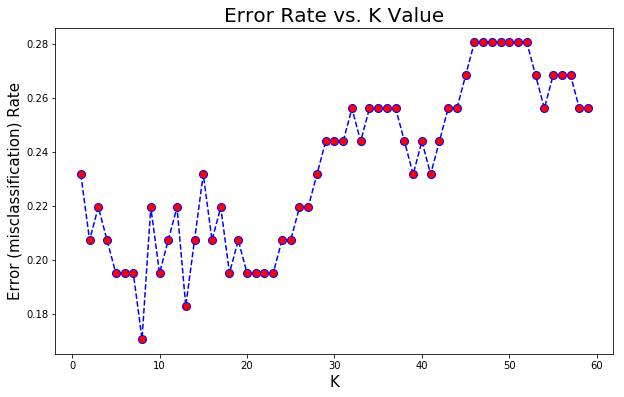

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [86]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost 
n_estimators = 10
seed = 7
pipelines = []
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from time import time
import scipy.stats as stats
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb
pipelines.append(('MNB',
                  Pipeline([ ('MNB', MultinomialNB())
                              ])))

# pipelines.append(('SVC',
#                   Pipeline([ ('SVC', SVC(random_state=seed))
#                               ])))

pipelines.append(('CATBoost',
                   Pipeline([ ('CATBoost', lgb.LGBMClassifier())
                               ])))

pipelines.append(('RF',
                  Pipeline([ ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators))
                              ])))

pipelines.append(('ET',
                  Pipeline([ ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators))
                              ])))


#pipelines.append(('XGB',
 #                 Pipeline([ ('XGB', XGBClassifier(random_state=seed))
  #                            ])))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)

MNB: 75.689177 (+/- 6.401627) performed in 0.052883 seconds
CATBoost: 84.801110 (+/- 4.586759) performed in 0.136631 seconds
RF: 82.853839 (+/- 5.559430) performed in 0.109113 seconds
ET: 85.240518 (+/- 4.559684) performed in 0.068820 seconds


In [101]:
model=ExtraTreesClassifier(n_estimators=251,class_weight='balanced',min_samples_leaf=1,random_state=99, criterion='entropy',max_features='log2')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X_test)
y_probs_r= model.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

85.36585365853658
0.29541754492400396


In [117]:
model=AdaBoostClassifier(n_estimators=6,random_state=99)
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X_test)
y_probs_r= model.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

87.8048780487805
0.3634251044585791


In [119]:
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
                                     
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from collections import Counter
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [120]:
clf_list = [('decision tree', DecisionTreeClassifier()),
            ('logistic regression', LogisticRegression()),
            ('knn', KNeighborsClassifier()),
            ('naive bayes classifier', GaussianNB())]

In [121]:
for model_tuple in clf_list:
    model = model_tuple[1]
    if 'random_state' in model.get_params().keys():
        model.set_params(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print(f"{model_tuple[0]}'s accuracy: {acc:.2f}")

decision tree's accuracy: 0.82
logistic regression's accuracy: 0.82
knn's accuracy: 0.80
naive bayes classifier's accuracy: 0.87


In [133]:
model=RandomForestClassifier(n_estimators=161,class_weight='balanced',min_samples_leaf=1,random_state=99, criterion='entropy',max_features='auto')
model.fit(X_train_s,y_train)
cross_val_score(model, X_train_s, y_train, cv=5, scoring='accuracy').mean()
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X_test_s)
y_probs_r= model.predict_proba(X_test_s)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

87.8048780487805
0.27693819252452606


In [153]:
#svc=SVC(kernel='rbf',class_weight={0:5,1:5}, C=1.0, random_state=100,gamma='auto',probability=1)
svc=SVC(kernel='rbf',class_weight='balanced', C=1.0, random_state=100,gamma='scale',probability=1)
svc.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = svc.predict(X_test)
print(accuracy_score(y_test, y_predict))
y_pred_r= svc.predict(X_test)
y_probs_r= svc.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

0.7682926829268293
0.401760502358454


In [154]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


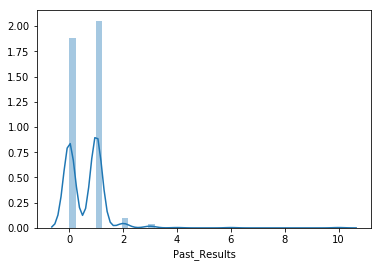

In [163]:
sns.distplot(train.Past_Results)

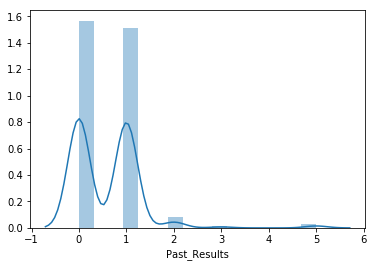

In [164]:
sns.distplot(test.Past_Results)

In [173]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
model1 = CatBoostClassifier(iterations=100,learning_rate=0.2)
model1.fit(X_train_s,y_train,plot=False)
from sklearn.model_selection import cross_val_score
cross_val_score(model1, X_train_s, y_train, cv=5, scoring='accuracy').mean()
y_pred_r= model1.predict(X_test_s)
y_probs_r= model1.predict_proba(X_test_s)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

0:	learn: 0.6200811	total: 2.96ms	remaining: 293ms
1:	learn: 0.5677473	total: 5.44ms	remaining: 267ms
2:	learn: 0.5359917	total: 7.39ms	remaining: 239ms
3:	learn: 0.5055196	total: 8.76ms	remaining: 210ms
4:	learn: 0.4679665	total: 10.1ms	remaining: 192ms
5:	learn: 0.4477887	total: 11.7ms	remaining: 183ms
6:	learn: 0.4222386	total: 13.9ms	remaining: 185ms
7:	learn: 0.4041017	total: 16.5ms	remaining: 190ms
8:	learn: 0.3927188	total: 19ms	remaining: 192ms
9:	learn: 0.3799613	total: 21.3ms	remaining: 192ms
10:	learn: 0.3651536	total: 23.2ms	remaining: 187ms
11:	learn: 0.3547729	total: 25.6ms	remaining: 188ms
12:	learn: 0.3462510	total: 27.8ms	remaining: 186ms
13:	learn: 0.3378593	total: 29.9ms	remaining: 184ms
14:	learn: 0.3304074	total: 33.2ms	remaining: 188ms
15:	learn: 0.3238641	total: 35.6ms	remaining: 187ms
16:	learn: 0.3170055	total: 37.9ms	remaining: 185ms
17:	learn: 0.3097760	total: 39.6ms	remaining: 180ms
18:	learn: 0.3047868	total: 41.2ms	remaining: 176ms
19:	learn: 0.2992121	tot

1:	learn: 0.5795113	total: 5.76ms	remaining: 282ms
2:	learn: 0.5516198	total: 7.83ms	remaining: 253ms
3:	learn: 0.5242539	total: 9.95ms	remaining: 239ms
4:	learn: 0.4873294	total: 11.8ms	remaining: 224ms
5:	learn: 0.4681615	total: 13.5ms	remaining: 212ms
6:	learn: 0.4414973	total: 15.9ms	remaining: 211ms
7:	learn: 0.4234995	total: 17.9ms	remaining: 206ms
8:	learn: 0.4123780	total: 19.9ms	remaining: 202ms
9:	learn: 0.3982697	total: 21.8ms	remaining: 197ms
10:	learn: 0.3857744	total: 23.4ms	remaining: 189ms
11:	learn: 0.3737123	total: 24.6ms	remaining: 180ms
12:	learn: 0.3632024	total: 25.9ms	remaining: 174ms
13:	learn: 0.3545006	total: 27.6ms	remaining: 169ms
14:	learn: 0.3452433	total: 28.9ms	remaining: 164ms
15:	learn: 0.3380491	total: 30.2ms	remaining: 159ms
16:	learn: 0.3311766	total: 31.3ms	remaining: 153ms
17:	learn: 0.3250253	total: 32.5ms	remaining: 148ms
18:	learn: 0.3200797	total: 34.4ms	remaining: 147ms
19:	learn: 0.3122888	total: 35.6ms	remaining: 142ms
20:	learn: 0.3081267	

69:	learn: 0.1659135	total: 110ms	remaining: 47.1ms
70:	learn: 0.1646394	total: 111ms	remaining: 45.5ms
71:	learn: 0.1639330	total: 113ms	remaining: 43.8ms
72:	learn: 0.1635865	total: 116ms	remaining: 42.8ms
73:	learn: 0.1619552	total: 117ms	remaining: 41.1ms
74:	learn: 0.1609332	total: 118ms	remaining: 39.5ms
75:	learn: 0.1601422	total: 120ms	remaining: 37.9ms
76:	learn: 0.1596278	total: 121ms	remaining: 36.3ms
77:	learn: 0.1594351	total: 122ms	remaining: 34.5ms
78:	learn: 0.1583627	total: 124ms	remaining: 32.9ms
79:	learn: 0.1573414	total: 125ms	remaining: 31.3ms
80:	learn: 0.1559794	total: 126ms	remaining: 29.6ms
81:	learn: 0.1552486	total: 128ms	remaining: 28ms
82:	learn: 0.1542057	total: 129ms	remaining: 26.4ms
83:	learn: 0.1532819	total: 130ms	remaining: 24.7ms
84:	learn: 0.1528067	total: 131ms	remaining: 23.2ms
85:	learn: 0.1515160	total: 132ms	remaining: 21.5ms
86:	learn: 0.1506239	total: 133ms	remaining: 19.9ms
87:	learn: 0.1495608	total: 134ms	remaining: 18.3ms
88:	learn: 0.1

In [174]:
X_test1_s = scaler.transform(test1)

In [175]:
y_probs_test = model1.predict_proba(X_test1_s)
print(y_probs_test)
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San6.xls",index=False)

[[0.00926071 0.99073929]
 [0.16254967 0.83745033]
 [0.9210661  0.0789339 ]
 [0.00367903 0.99632097]
 [0.13510699 0.86489301]
 [0.84948162 0.15051838]
 [0.94010327 0.05989673]
 [0.95633411 0.04366589]
 [0.27084304 0.72915696]
 [0.01695441 0.98304559]
 [0.01698333 0.98301667]
 [0.94543932 0.05456068]
 [0.50581452 0.49418548]
 [0.84023879 0.15976121]
 [0.03610931 0.96389069]
 [0.93838477 0.06161523]
 [0.29143858 0.70856142]
 [0.75489956 0.24510044]
 [0.16141839 0.83858161]
 [0.00227907 0.99772093]
 [0.86034957 0.13965043]
 [0.7689711  0.2310289 ]
 [0.09800281 0.90199719]
 [0.91214871 0.08785129]
 [0.81651077 0.18348923]
 [0.01663888 0.98336112]
 [0.17842092 0.82157908]
 [0.01227717 0.98772283]
 [0.01416986 0.98583014]
 [0.82492605 0.17507395]
 [0.66524213 0.33475787]
 [0.00812265 0.99187735]
 [0.01373335 0.98626665]
 [0.00398521 0.99601479]
 [0.93365472 0.06634528]
 [0.91821622 0.08178378]
 [0.0041774  0.9958226 ]
 [0.85534118 0.14465882]
 [0.8650095  0.1349905 ]
 [0.9540499  0.0459501 ]


In [178]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# evaluate the model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X_train, y_train)
# make a single prediction
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
print(pd.crosstab(y_test, y_predict))
y_pred_r= model1.predict(X_test)
y_probs_r= model1.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

Accuracy: 0.865 (0.068)
col_0         0   1
IsUnderRisk        
0            32   4
1             8  38
1.29423826545401


In [179]:

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [180]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
##classifier=xgboost.XGBClassifier()
classifier1 = lgb.LGBMClassifier()

random_search=RandomizedSearchCV(classifier1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [181]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [182]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



 Time taken: 0 hours 0 minutes and 0.45 seconds.


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


In [183]:
random_search.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.3,
               gamma=0.1, importance_type='split', learning_rate=0.05,
               max_depth=4, min_child_samples=20, min_child_weight=7,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [184]:
classifier1=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.4,
        gamma=0.4, importance_type='split', learning_rate=0.25,
        max_depth=12, min_child_samples=20, min_child_weight=1,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [186]:
classifier1.fit(X_train,y_train)
cross_val_score(classifier1, X_train, y_train, cv=5, scoring='accuracy').mean()
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= classifier1.predict(X_test)
y_probs_r= classifier1.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

85.36585365853658
0.36106100593621865


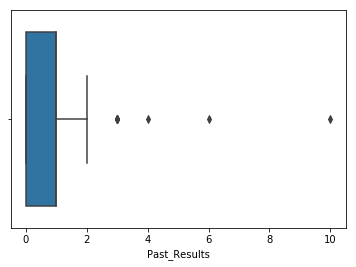

In [188]:
sns.boxplot(train.Past_Results)

In [208]:
print(train.Past_Results[train.Past_Results >=5])
##print(train3.total_programs_enrolled[train.Past_Results>=7])

401     6
478    10
Name: Past_Results, dtype: int64


In [209]:
train3=train.drop(train[train.Past_Results >= 5].index)

In [210]:
train3.shape

(541, 8)

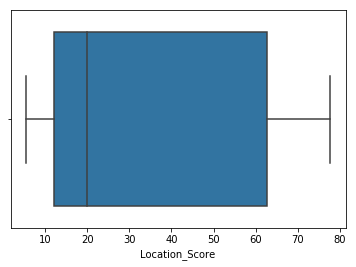

In [200]:
sns.boxplot(test.Location_Score)

In [257]:
X=train.drop(['IsUnderRisk'],axis=1)
y=train['IsUnderRisk']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.21,random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((428, 7), (115, 7), (428,), (115,))

In [258]:
model=RandomForestClassifier(n_estimators=300,random_state=99, criterion='entropy',class_weight='balanced',min_samples_leaf=2,max_features='log2')
model.fit(X_train,y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)
from sklearn.metrics import log_loss
y_pred_r= model.predict(X_test)
y_probs_r= model.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

88.69565217391305
0.2580119790131167


In [247]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model.predict_proba(test)
y_probs_test
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San7.xls",index=False)
y_probs_test

array([[0.02330374, 0.97669626],
       [0.16625238, 0.83374762],
       [0.84161194, 0.15838806],
       [0.        , 1.        ],
       [0.24957991, 0.75042009],
       [0.69153547, 0.30846453],
       [0.93531457, 0.06468543],
       [0.88080819, 0.11919181],
       [0.17435597, 0.82564403],
       [0.01702039, 0.98297961],
       [0.05265928, 0.94734072],
       [0.90434988, 0.09565012],
       [0.49678534, 0.50321466],
       [0.79093687, 0.20906313],
       [0.00805579, 0.99194421],
       [0.86082859, 0.13917141],
       [0.39686221, 0.60313779],
       [0.71013036, 0.28986964],
       [0.31119151, 0.68880849],
       [0.        , 1.        ],
       [0.75717046, 0.24282954],
       [0.54252196, 0.45747804],
       [0.16082905, 0.83917095],
       [0.90806552, 0.09193448],
       [0.82392122, 0.17607878],
       [0.00816947, 0.99183053],
       [0.23566142, 0.76433858],
       [0.00472246, 0.99527754],
       [0.02035373, 0.97964627],
       [0.80367519, 0.19632481],
       [0.

In [272]:
y_probs_test

array([[0.025, 0.975],
       [0.095, 0.905],
       [0.82 , 0.18 ],
       [0.   , 1.   ],
       [0.17 , 0.83 ],
       [0.685, 0.315],
       [0.935, 0.065],
       [0.83 , 0.17 ],
       [0.11 , 0.89 ],
       [0.01 , 0.99 ],
       [0.05 , 0.95 ],
       [0.85 , 0.15 ],
       [0.46 , 0.54 ],
       [0.825, 0.175],
       [0.   , 1.   ],
       [0.8  , 0.2  ],
       [0.37 , 0.63 ],
       [0.55 , 0.45 ],
       [0.3  , 0.7  ],
       [0.   , 1.   ],
       [0.75 , 0.25 ],
       [0.455, 0.545],
       [0.115, 0.885],
       [0.89 , 0.11 ],
       [0.83 , 0.17 ],
       [0.005, 0.995],
       [0.145, 0.855],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.675, 0.325],
       [0.56 , 0.44 ],
       [0.02 , 0.98 ],
       [0.025, 0.975],
       [0.   , 1.   ],
       [0.805, 0.195],
       [0.865, 0.135],
       [0.   , 1.   ],
       [0.835, 0.165],
       [0.825, 0.175],
       [0.84 , 0.16 ],
       [0.005, 0.995],
       [0.755, 0.245],
       [0.41 , 0.59 ],
       [0.8

In [231]:
y_probs_test

array([[0.025, 0.975],
       [0.095, 0.905],
       [0.82 , 0.18 ],
       [0.   , 1.   ],
       [0.17 , 0.83 ],
       [0.685, 0.315],
       [0.935, 0.065],
       [0.83 , 0.17 ],
       [0.11 , 0.89 ],
       [0.01 , 0.99 ],
       [0.05 , 0.95 ],
       [0.85 , 0.15 ],
       [0.46 , 0.54 ],
       [0.825, 0.175],
       [0.   , 1.   ],
       [0.8  , 0.2  ],
       [0.37 , 0.63 ],
       [0.55 , 0.45 ],
       [0.3  , 0.7  ],
       [0.   , 1.   ],
       [0.75 , 0.25 ],
       [0.455, 0.545],
       [0.115, 0.885],
       [0.89 , 0.11 ],
       [0.83 , 0.17 ],
       [0.005, 0.995],
       [0.145, 0.855],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.675, 0.325],
       [0.56 , 0.44 ],
       [0.02 , 0.98 ],
       [0.025, 0.975],
       [0.   , 1.   ],
       [0.805, 0.195],
       [0.865, 0.135],
       [0.   , 1.   ],
       [0.835, 0.165],
       [0.825, 0.175],
       [0.84 , 0.16 ],
       [0.005, 0.995],
       [0.755, 0.245],
       [0.41 , 0.59 ],
       [0.8

In [248]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)
X_train_smote.shape,y_train_smote.shape

from collections import Counter
print('Before SMOTE',Counter(y_train))
print('After SMOTE',Counter(y_train_smote))

Before SMOTE Counter({1: 273, 0: 155})
After SMOTE Counter({0: 273, 1: 273})


In [259]:
model2=RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=None,min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=99, verbose=0, warm_start=False,class_weight=None)
model2.fit(X_train_smote,y_train_smote)
from sklearn.model_selection import cross_val_score
cross_val_score(model2, X_train_smote, y_train_smote, cv=5, scoring='accuracy').mean()
y_predict = model2.predict(X_test)
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)
y_pred_r= model2.predict(X_test)
y_probs_r= model2.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

0.9130434782608695
0.2557826604897012


In [314]:
X=train.drop(['IsUnderRisk'],axis=1)
y=train['IsUnderRisk']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.21,random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
model2=RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=15,min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=99, verbose=0, warm_start=False,class_weight='balanced')
model2.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(model2, X_train, y_train, cv=5, scoring='accuracy').mean()
y_predict = model2.predict(X_test)
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)
y_pred_r= model2.predict(X_test)
y_probs_r= model2.predict_proba(X_test)
score_r = log_loss(y_test,y_probs_r)
print(score_r)

0.8956521739130435
0.2601028264108864


In [315]:
##y_probs_test = lnr_class.predict_proba(df_test)
y_probs_test = model2.predict_proba(test)
y_probs_test
submission = pd.DataFrame(y_probs_test)
submission.to_excel("submissionInspectionResults_San8.xls",index=False)
y_probs_test*10

array([[ 0.33719843,  9.66280157],
       [ 1.52578482,  8.47421518],
       [ 8.42712603,  1.57287397],
       [ 0.        , 10.        ],
       [ 2.58892712,  7.41107288],
       [ 7.0863392 ,  2.9136608 ],
       [ 9.34053083,  0.65946917],
       [ 8.91088906,  1.08911094],
       [ 1.89748212,  8.10251788],
       [ 0.17341338,  9.82658662],
       [ 0.67516086,  9.32483914],
       [ 9.04816721,  0.95183279],
       [ 4.9785253 ,  5.0214747 ],
       [ 8.00364037,  1.99635963],
       [ 0.03894437,  9.96105563],
       [ 8.63648089,  1.36351911],
       [ 4.05355219,  5.94644781],
       [ 7.17399679,  2.82600321],
       [ 2.80803369,  7.19196631],
       [ 0.        , 10.        ],
       [ 7.45718288,  2.54281712],
       [ 5.55689335,  4.44310665],
       [ 1.63848973,  8.36151027],
       [ 9.05947555,  0.94052445],
       [ 7.95438939,  2.04561061],
       [ 0.07254207,  9.92745793],
       [ 2.25085377,  7.74914623],
       [ 0.03189252,  9.96810748],
       [ 0.12341338,